## Inercja

suma kwadratów różnic pomiędzy każdym obiektem ($x_i$) a środkiem klastra ($C_k$):

$$\sum_{i=1}^{n}(x_i - C_k)^2$$

 - niższe wartości wskazują na wyodrębnienie bardziej spójnych grup.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

D:\ProgramFiles\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
n = 100

centra = [(-6,-6), (0,0), (6,6), (9,9)]

X, y = make_blobs(n_samples=n, n_features=2, centers=centra, cluster_std=1, random_state=0)

In [3]:
df = pd.DataFrame(X, columns = ['x1', 'x2'])

In [4]:
df['Grupy']= y

In [5]:
df

,x1,x2,Grupy
0,-5.845053,-5.621837,0
1,8.356382,6.776597,3
2,0.066517,0.302472,1
3,7.895617,9.052165,3
4,8.544467,9.017479,3
...,...,...,...
95,-1.070753,1.054452,1
96,5.087178,7.117016,2
97,0.126912,0.401989,1
98,6.947252,5.844990,2


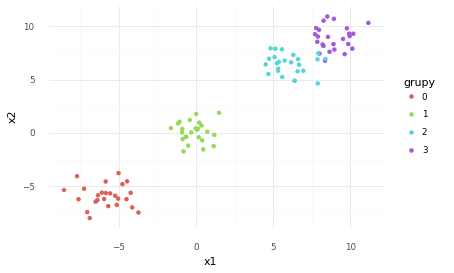

<ggplot: (148308510332)>

In [6]:
(ggplot(df, aes(x='x1', y ='x2', color='factor(Grupy)')) + 
 geom_point() +
 theme_minimal() +
 labs(color = 'grupy'))

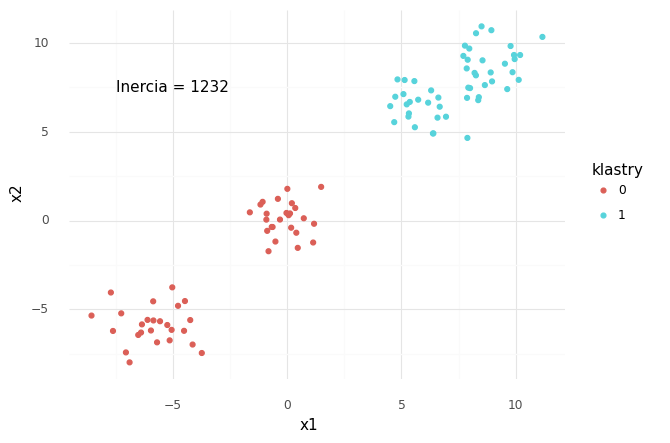

<ggplot: (140401168077)>

In [16]:
# k-means
km_2 = KMeans(n_clusters = 2).fit(df[['x1', 'x2']])

# dodanie do ramki kolumny z etykietami klastrów
df['klastry_2'] = km_2.labels_
# df['klastry_2'] = km_2.predict(df[['x1', 'x2']])

# wykres
(ggplot(df, aes(x='x1', y ='x2', color='factor(klastry_2)')) + 
 geom_point() +
 annotate(geom='text', x = -5, y= 7.5, label = f'Inercia = {round(km_2.inertia_)}') +
 theme_minimal() +
 labs(color = 'klastry'))

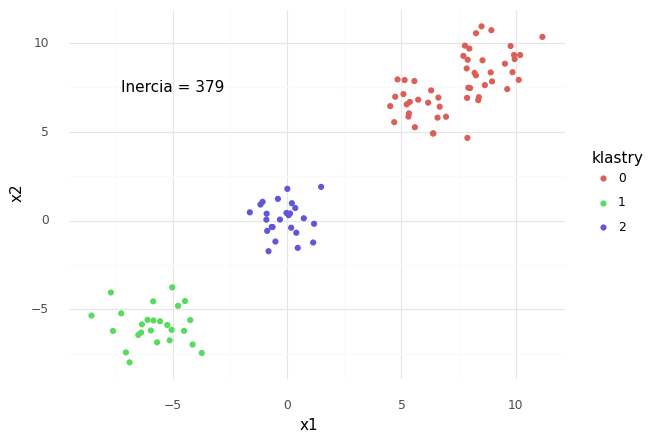

<ggplot: (148308633585)>

In [7]:
# k-means
km_3 = KMeans(n_clusters = 3).fit(df[['x1', 'x2']])

# dodanie do ramki kolumny z etykietami klastrów
df['klastry_3'] = km_3.labels_
# df['klastry_2'] = km_2.predict(df[['x1', 'x2']])

# wykres
(ggplot(df, aes(x='x1', y ='x2', color='factor(klastry_3)')) + 
 geom_point() +
 annotate(geom='text', x = -5, y= 7.5, label = f'Inercia = {round(km_3.inertia_)}') +
 theme_minimal() +
 labs(color = 'klastry'))

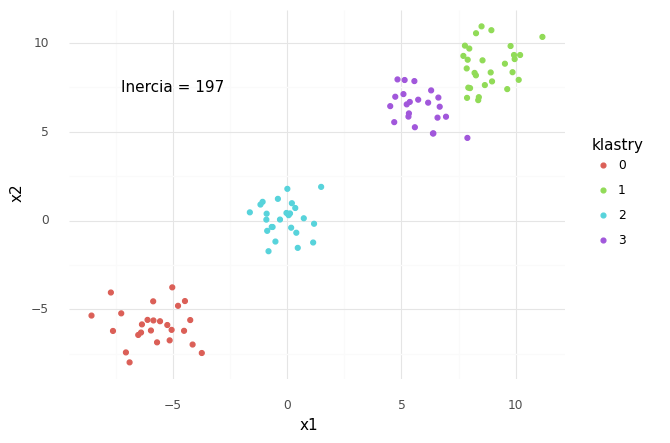

<ggplot: (140401339016)>

In [18]:
# k-means
km_4 = KMeans(n_clusters = 4).fit(df[['x1', 'x2']])

# dodanie do ramki kolumny z etykietami klastrów
df['klastry_4'] = km_4.labels_
# df['klastry_2'] = km_4.predict(df[['x1', 'x2']])

# wykres
(ggplot(df, aes(x='x1', y ='x2', color='factor(klastry_4)')) + 
 geom_point() +
 annotate(geom='text', x = -5, y= 7.5, label = f'Inercia = {round(km_4.inertia_)}') +
 theme_minimal() +
 labs(color = 'klastry'))

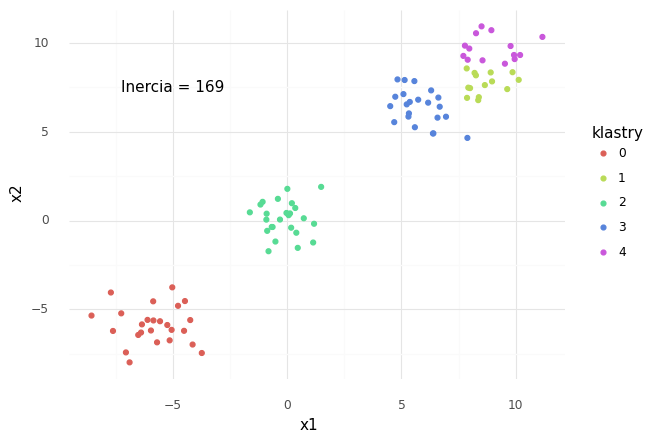

<ggplot: (140401451783)>

In [19]:
# k-means
km_5 = KMeans(n_clusters = 5).fit(df[['x1', 'x2']])

# dodanie do ramki kolumny z etykietami klastrów
df['klastry_5'] = km_5.labels_
# df['klastry_2'] = km_2.predict(df[['x1', 'x2']])

# wykres
(ggplot(df, aes(x='x1', y ='x2', color='factor(klastry_5)')) + 
 geom_point() +
 annotate(geom='text', x = -5, y= 7.5, label = f'Inercia = {round(km_5.inertia_)}') +
 theme_minimal() +
 labs(color = 'klastry'))

## Wykres osypiska

Wizualizacja wartości inercji dla wyników grupowania z przyjętymi podziałami na $k$ klastrów. Szukamy punktu, przy którym następuje spadek przyrostu inercji. Jak podaje Krzyśko i in. (2008, s. 354), wraz ze wzrostem liczby klastrów, suma wariancji wewnątrzgrupowej maleje. Zatem w celu wybrania optymalnej liczby klastrów można posłużyć się zestawieniem na wykresie sum wariancji wewnątrzgrupowych wraz z liczbą klastrów i zastosować heurystyczne podejście zwane metodą łokcia – znaleźć punkt silnego przegięcia, po którym suma wariancji przestaje znacząco spadać. Ten punkt sugeruje, że podział na coraz większą liczbę skupisk w niewielkim stopniu wpływa na podniesienie jakości grupowania (wyodrębnienia spójnych klastrów). 

In [22]:
ks = range(2, 20)
inercje = []

for k in ks:
    km = KMeans(n_clusters=k).fit(df[['x1', 'x2']])
    inercje.append(km.inertia_)

In [24]:
inercje_df = pd.DataFrame({'K':ks, 'Inercja' : inercje})

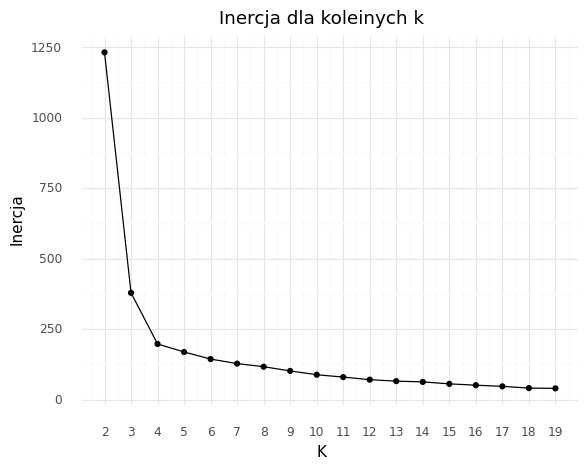

<ggplot: (140401206815)>

In [28]:
(ggplot(inercje_df, aes(x='K', y='Inercja'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Inercja dla koleinych k'))